In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Context

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
data.shape

(100000, 12)

# Data quality assessment

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [6]:
data.isnull().sum()/data.shape[0]

PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.03292
SibSp          0.00000
Parch          0.00000
Ticket         0.04623
Fare           0.00134
Cabin          0.67866
Embarked       0.00250
dtype: float64

<AxesSubplot:>

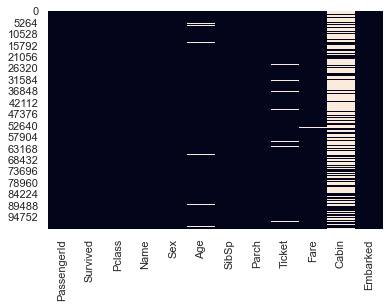

In [7]:
sns.heatmap(data.isnull(), cbar=False)

Большинство пропусков приходятся на столбцы с каютой и билетом. Возраст и цену билета можно легко заполнить, например средним значением

# Data exploration

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99995,99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [11]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


<AxesSubplot:xlabel='Survived', ylabel='count'>

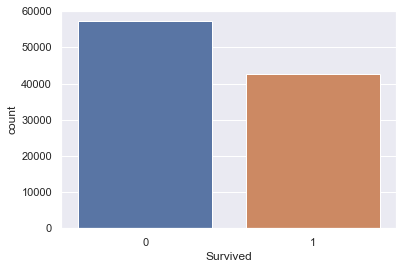

In [12]:
sns.countplot(data['Survived'])

In [13]:
print(f"Доля выживших: {data.Survived.mean()}")

Доля выживших: 0.42774


In [14]:
data[['Sex', 'Survived']].groupby(['Sex']).value_counts(normalize=True, sort=False)

Sex     Survived
female  0           0.288475
        1           0.711525
male    0           0.794205
        1           0.205795
dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

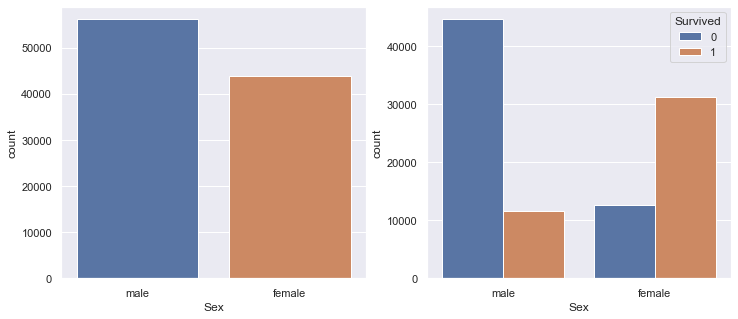

In [15]:
f, ax = plt.subplots(1,2, figsize=(12, 5))

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
sns.countplot(x='Sex', data=data, ax=ax[0])

Количество спасённых женщин больше чем в 2 раза превышает количество спасённых мужчие, несмостря на то, что последних на корабле было больше. Доля выживших женщин около 71%, в то время как доля выживших мужчин около 20%

In [16]:
data['Pclass'].value_counts(normalize=True).sort_index()

1    0.30315
2    0.28679
3    0.41006
Name: Pclass, dtype: float64

In [17]:
data[['Pclass', 'Survived']].groupby('Pclass').value_counts(normalize=True).sort_index()

Pclass  Survived
1       0           0.420221
        1           0.579779
2       0           0.474982
        1           0.525018
3       0           0.752695
        1           0.247305
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

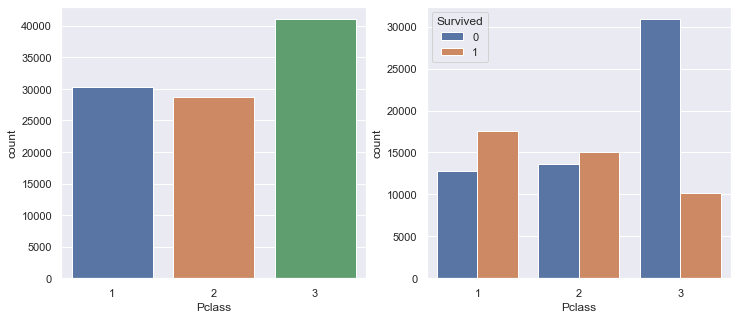

In [18]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='Pclass', data=data, ax=ax[0])
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])

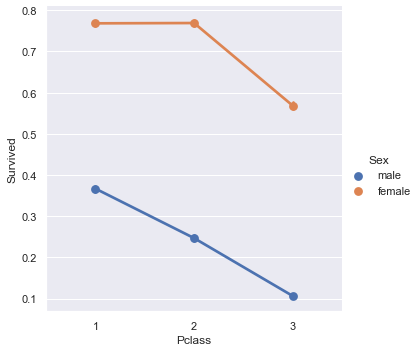

In [19]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=data)

Принадлежность пассажира к тому или иному классу также является важным признаком. Так принадлежность к 1 или 2 классу даёт вероятность выжить больше 50%

<AxesSubplot:xlabel='Embarked', ylabel='count'>

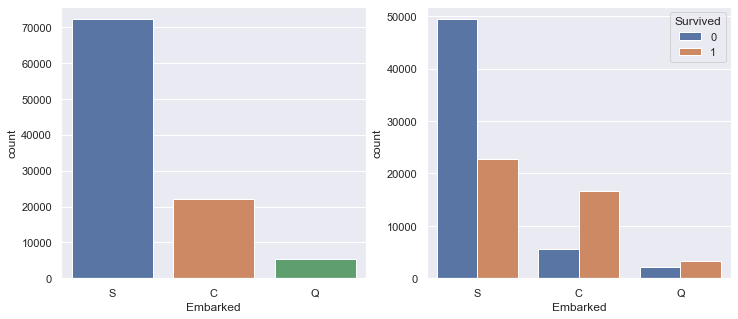

In [20]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='Embarked', data=data, ax=ax[0])
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1])

Похоже что порт посадки также влияет на выживаемость

<AxesSubplot:xlabel='Embarked', ylabel='count'>

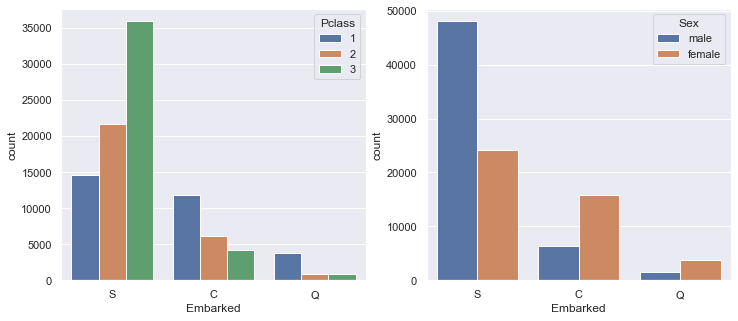

In [21]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[0])
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[1])

График выше, похоже, объясняет найденную закономерность, так как в портах C и Q посадку совершали более состоятельные пассажиры, а из порта S большинство пассажиров принадлежало 3 классу, доля выживших среди которого составляет около 25%

Также на выживаемость сильно повлияла очень большая доля женщин, совершивших посадку в портах C и Q

In [22]:
data['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

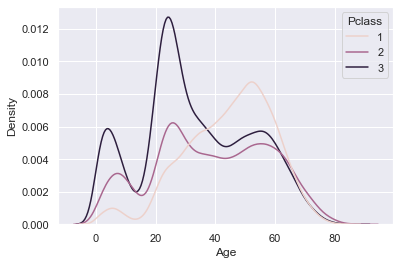

In [23]:
sns.kdeplot(x='Age', hue='Pclass', data=data)

Видно, что первый и третий класс очень сильно отличаются по возрастному составу. Посмотрим как это влияет на выживаемость

<AxesSubplot:xlabel='Sex', ylabel='Age'>

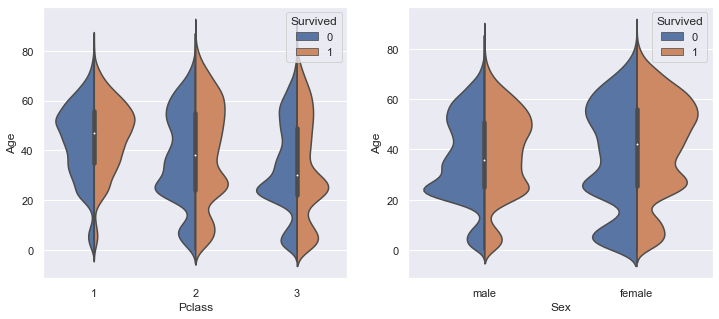

In [24]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])

Text(0.5, 1.0, 'Pclass=3')

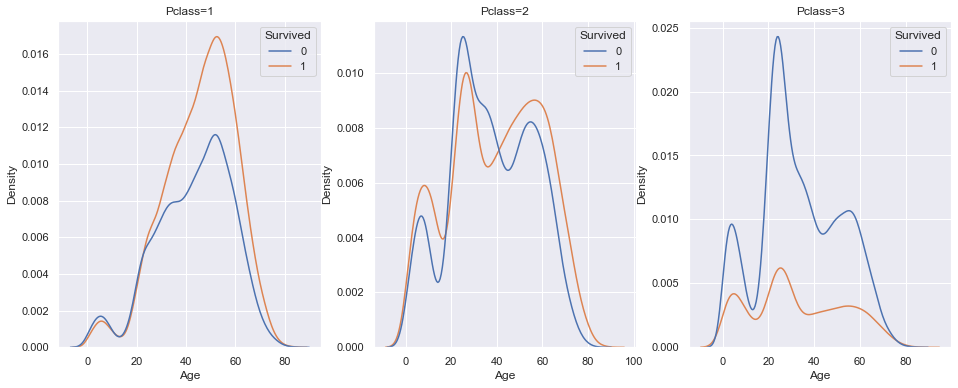

In [25]:
f, ax = plt.subplots(1,3, figsize=(16,6))

sns.kdeplot(x='Age', hue='Survived', data=data[data.Pclass == 1], ax=ax[0])
ax[0].set_title('Pclass=1')
sns.kdeplot(x='Age', hue='Survived', data=data[data.Pclass == 2], ax=ax[1])
ax[1].set_title('Pclass=2')
sns.kdeplot(x='Age', hue='Survived', data=data[data.Pclass == 3], ax=ax[2])
ax[2].set_title('Pclass=3')

<AxesSubplot:xlabel='Age'>

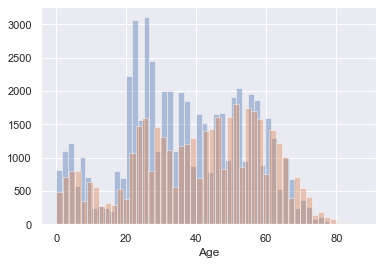

In [26]:
sns.distplot(data[data.Survived == 0]['Age'], kde=False)
sns.distplot(data[data.Survived == 1]['Age'], kde=False)

Для каждно класса вероятность выжить минимальна при возрасте 20-40 лет, однако для 1 класса вероятность выжить высока в любом случае. Самая большая вероятность выжить у стариков

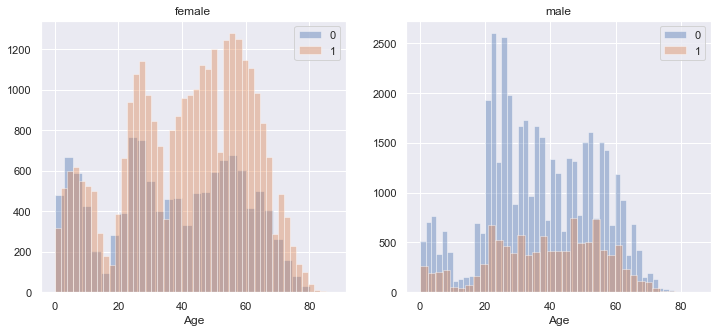

In [27]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(data[(data.Survived == 0) & (data.Sex=='female')]['Age'], kde=False, ax=ax[0], label='0')
sns.distplot(data[(data.Survived == 1) & (data.Sex=='female')]['Age'], kde=False, ax=ax[0], label='1')
ax[0].set_title('female')
ax[0].legend()

sns.distplot(data[(data.Survived == 0) & (data.Sex=='male')]['Age'], kde=False, ax=ax[1], label='0')
sns.distplot(data[(data.Survived == 1) & (data.Sex=='male')]['Age'], kde=False, ax=ax[1], label='1')
ax[1].set_title('male')
ax[1].legend()

Интересно, что женщины среднего возраста выживают чаще чем дети

In [28]:
data['SibSp'].value_counts().sort_index()

0    73308
1    19758
2     3703
3     1635
4     1168
5      132
8      296
Name: SibSp, dtype: int64

In [29]:
pd.crosstab(data.SibSp, data.Pclass)

Pclass,1,2,3
SibSp,,,
0,19483,22125,31700
1,8714,4283,6761
2,1368,1329,1006
3,525,293,817
4,154,483,531
5,24,40,68
8,47,126,123


Не похоже что размер семьи сильно зависит от класса пассажира

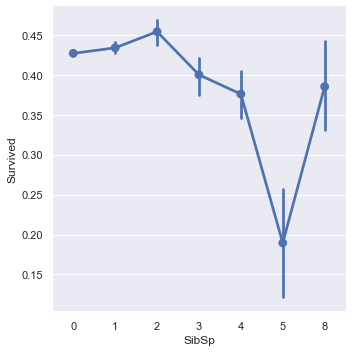

In [30]:
sns.factorplot(x='SibSp', y='Survived', data=data)

Если человек путешествует с одним или двумя родственниками, то шансы выжить немного увеличиваются, однако если количество родственников увеличивается, то шансы выжить сильно уменьшаются. Аномально низкие шансы выжить у людей с 5 родственниками

<AxesSubplot:xlabel='SibSp', ylabel='count'>

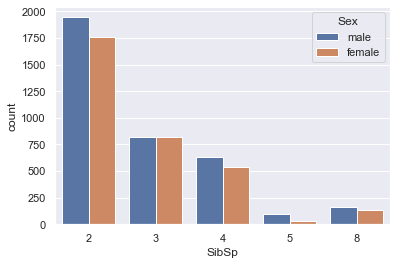

In [31]:
sns.countplot(x='SibSp', hue='Sex', data=data[data.SibSp>1])

In [32]:
data.groupby('SibSp')[['SibSp', 'Sex']].value_counts(normalize=True)

SibSp  Sex   
0      male      0.574644
       female    0.425356
1      male      0.522877
       female    0.477123
2      male      0.525250
       female    0.474750
3      male      0.500306
       female    0.499694
4      male      0.541096
       female    0.458904
5      male      0.742424
       female    0.257576
8      male      0.554054
       female    0.445946
dtype: float64

Низкую выживаемость людей с 5 родственниками можно объяснить сильными преобладанием в этой группе мужчин

In [33]:
data['Parch'].value_counts().sort_index()

0    73540
1    12996
2    11236
3      983
4      446
5      331
6      204
9      264
Name: Parch, dtype: int64

In [34]:
pd.crosstab(data.Parch, data.Pclass)

Pclass,1,2,3
Parch,,,
0,21888,20166,31486
1,3001,5965,4030
2,4537,2042,4657
3,519,177,287
4,154,68,224
5,109,117,105
6,26,54,124
9,81,90,93


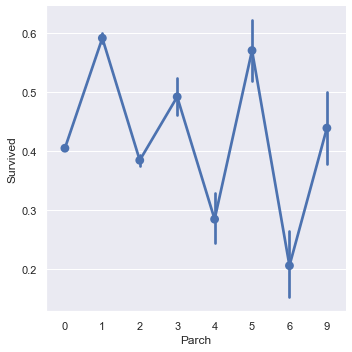

In [35]:
sns.factorplot(x='Parch', y='Survived', data=data)

У людей с нечётным количеством родителей/детей на борту шансы выжить больше чем у людей с чётным количеством родителей/детей на борту

In [36]:
data['Fare'].describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

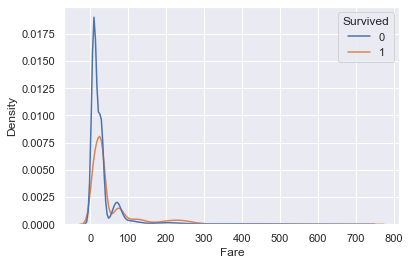

In [37]:
sns.kdeplot(x='Fare', hue='Survived', data=data)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

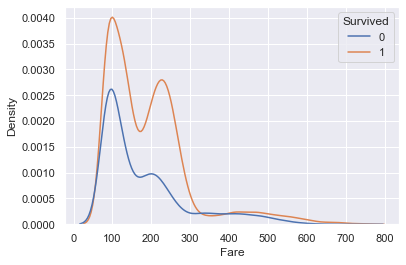

In [38]:
sns.kdeplot(x='Fare', hue='Survived', data=data[data.Fare>80])

Ожидаемо, при большой цене билета вероятность выжить существенно увеличивается

<AxesSubplot:>

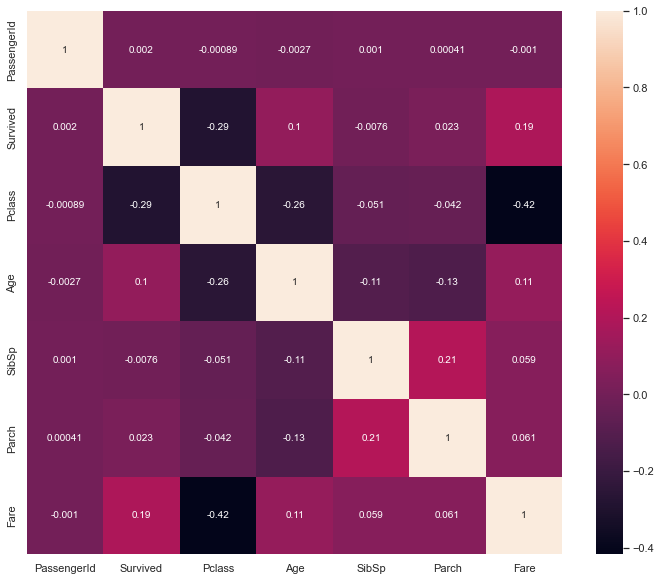

In [39]:
plt.figure(figsize=(12,10))

sns.heatmap(data.corr(), annot=True)

# Summary

<ul>
    <li><b>Sex</b>: очень важный признак: 70% женщин выживает, при этом их мужчин выживает всего 25%. </li>
    <li><b>Pclass</b>: также очень важный признак. Для пассажиров из первого класса шанс выжить сильно больше чем у пассажиров из третьего класса. В сочетании с полом получится ещё более сильный признак. Так, например, для женщин из 1 и 2 классов вероятность выжить около 80%, в то время у мужчин из 3 класса вероятность выжить около 10%</li>
    <li><b>Embarked</b>: вероятность выжить для пассажиров их C и Q больше чем для пассажиров из S. Это можно объяснить большей долей женщин и пассажиров 1 и 2 классов среди пассажиров из этих двух портов</li>
    <li><b>Age</b>: Для пассажиров в возрасте 20-40 лет вероятность выжить минимальна</li>
    <li><b>SibSp</b>: Если человек путешествует с одним или двумя родственниками, то шансы выжить немного увеличиваются, однако если количество родственников увеличивается, то шансы выжить сильно уменьшаются. Из пассажиров с 5 родственниками большинство мужчины, поэтому в этой группе максимальная смертность</li>
    <li><b>Parch</b>: с увеличением детей вероятность выжить уменьшается, однако у людей с нечётным количеством родителей/детей шансы выжить сильно больше чем у людей с чётным количеством родителей/детей</li>
</ul>